## ML4CommNet Project

### Data import

In [1]:
bulb_ip = [1,2,12,13,23,24,34,35,45,46,47,54,55,65,66,76,77,87,88,98,99,100, 
          107,108,118,119,129,130,140,141,151,152,153]
camera_ip = [3,14,25,36,48,56,67,78,89,101,109,120,131,142,154]
fire_ip = [4,15,26,37,49,57,68,79,90,102,110,121,132,143,155]
plug_ip = [5,6,7,8,9,16,17,18,19,20,27,28,29,30,31,38,39,40,41,42,50,51,52,58,59,60,61,62,
          69,70,71,72,73,80,81,82,83,84,91,92,93,94,95,103,104,105,111,112,113,114,
          115,122,123,124,125,126,133,134,135,136,137,144,145,146,147,148,156,157,158]
smart_tv_ip = [10,21,32,43,63,74,85,96,116,127,138,149]
thermo_ip = [11,22,33,44,53,64,75,86,97,106,117,128,139,150,159]
quick_ip = [160]
heavy_ip = [162]
connect_ip = [161]

def label_sensor(row):
    if any('.{}.'.format(i) in row['SrcAddr'] for i in bulb_ip):
        return 'Bulb'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in camera_ip):
        return 'Camera'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in fire_ip):
        return 'Fire'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in plug_ip):
        return 'Plug'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in smart_tv_ip):
        return 'SmartTv'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in thermo_ip):
        return 'Thermo'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in quick_ip):
        return 'Quick'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in heavy_ip):
        return 'Heavy'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in connect_ip):
        return 'Connect'
    
    return 'Other'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataframe from...
df_NaN = pd.read_csv('experiments/3rd_time.csv', skiprows=1, delim_whitespace=True, names=['StartTime', 'Proto', 'SrcAddr', 'DstAddr', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Dur', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Retrans', 'SrcRetra', 'DstRetra', 'pRetran', 'Rate', 'SrcRate', 'DstRate', 'Dir', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat'])

# clean * values if not done from outside (DO IT from outisde)
# df = df.replace('\*', '', regex=True)

# assign labels to the sensors
df_NaN['Sensor'] = df_NaN.apply(lambda row: label_sensor(row), axis=1)

In [3]:
df_NaN['Sensor'].value_counts()

Plug       32023
Connect    31631
Bulb       14514
Camera      8405
Thermo      6759
Fire        6416
SmartTv     6367
Quick       6122
Other        666
Heavy        622
Name: Sensor, dtype: int64

#### Check NaN columns

In [10]:
is_NaN = df_NaN.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_NaN[row_has_NaN]
rows_with_NaN

# SynAck AckDat

,StartTime,Proto,SrcAddr,DstAddr,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,...,SrcRate,DstRate,Dir,State,SrcWin,DstWin,TcpRtt,SynAck,AckDat,Sensor
3729,08:31:20.414772,tcp,10.0.0.161.52603,10.0.0.251.1883,20,0,20,15220,0,15220,...,0.000000,5.890667,->,CON,0.004731,0.000017,0.004714,NaN,NaN,Connect
3731,08:31:20.414801,tcp,10.0.0.161.34043,10.0.0.251.1883,20,0,20,15736,0,15736,...,0.000000,5.832842,->,CON,0.004729,0.000010,0.004719,NaN,NaN,Connect
3732,08:31:20.414812,tcp,10.0.0.161.42989,10.0.0.251.1883,20,0,20,15700,0,15700,...,0.000000,5.832812,->,CON,0.005016,0.000009,0.005007,NaN,NaN,Connect
3733,08:31:20.414822,tcp,10.0.0.161.35123,10.0.0.251.1883,20,0,20,15700,0,15700,...,0.000000,5.832833,->,CON,0.005610,0.000010,0.005600,NaN,NaN,Connect
3734,08:31:20.414832,tcp,10.0.0.161.44875,10.0.0.251.1883,20,0,20,15254,0,15254,...,0.000000,5.890817,->,CON,0.005308,0.000016,0.005292,NaN,NaN,Connect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113486,15:28:24.031142,tcp,10.0.0.160.37819,10.0.0.251.1883,438,438,0,1227852,1227852,0,...,87.572731,0.000000,->,CON,42496.000000,0.006285,0.000024,0.006261,NaN,Quick
113487,15:28:29.045502,tcp,10.0.0.160.37819,10.0.0.251.1883,440,440,0,1225088,1225088,0,...,88.187279,0.000000,->,CON,42496.000000,0.006285,0.000024,0.006261,NaN,Quick
113498,15:29:19.122966,tcp,10.0.0.160.37819,10.0.0.251.1883,422,422,0,1223900,1223900,0,...,84.571960,0.000000,->,CON,42496.000000,0.006285,0.000024,0.006261,NaN,Quick
113518,15:31:57.261010,tcp,10.0.0.160.34069,10.0.0.251.1883,436,436,0,1227720,1227720,0,...,87.170998,0.000000,->,CON,42496.000000,0.006598,0.000025,0.006573,NaN,Quick


In [4]:
#dropNA for majority sensors
df_majority = df_NaN.loc[df_NaN['Sensor'].isin(['Connect', 'Plug', 'Bulb', 'Camera', 'Thermo', 'Fire', 'SmartTv'])].dropna()
df_minority = df_NaN.loc[df_NaN['Sensor'].isin(['Quick', 'Heavy'])].fillna(0)
df = pd.concat([df_minority, df_majority])

print("Feature number => {}".format(df.shape[1]))
df.head()


Feature number => 33


,StartTime,Proto,SrcAddr,DstAddr,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,...,SrcRate,DstRate,Dir,State,SrcWin,DstWin,TcpRtt,SynAck,AckDat,Sensor
3718,08:31:20.369733,tcp,10.0.0.160.39387,10.0.0.251.1883,624,328,296,654166,634606,19560,...,65.588905,59.170422,->,CON,42496.0,10240.0,0.017832,0.000014,0.017818,Quick
4441,08:31:25.378634,tcp,10.0.0.160.39387,10.0.0.251.1883,534,294,240,646300,630460,15840,...,58.713245,47.892376,->,CON,42496.0,11264.0,0.017832,0.000014,0.017818,Quick
5239,08:31:30.381096,tcp,10.0.0.160.39387,10.0.0.251.1883,532,294,238,663544,647836,15708,...,58.821701,47.579327,->,CON,42496.0,11264.0,0.017832,0.000014,0.017818,Quick
5969,08:31:35.385419,tcp,10.0.0.160.39387,10.0.0.251.1883,578,322,256,695604,678708,16896,...,65.748329,52.229984,->,CON,42496.0,1536.0,0.017832,0.000014,0.017818,Quick
6610,08:31:40.569169,tcp,10.0.0.160.39387,10.0.0.251.1883,404,224,180,481800,469920,11880,...,61.780437,49.590572,->,RST,42496.0,512.0,0.017832,0.000014,0.017818,Quick


In [5]:
df['Sensor'].value_counts()

Connect    24033
Quick       6122
Plug        4511
Camera      2596
SmartTv     1801
Bulb        1611
Fire         811
Thermo       677
Heavy        622
Name: Sensor, dtype: int64

# Dataset Features

In [6]:
print("Dataset columns: \n{}".format(df.columns.to_list()))

Dataset columns: 
['StartTime', 'Proto', 'SrcAddr', 'DstAddr', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Dur', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Retrans', 'SrcRetra', 'DstRetra', 'pRetran', 'Rate', 'SrcRate', 'DstRate', 'Dir', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat', 'Sensor']


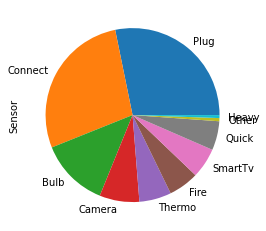

In [7]:
df_NaN['Sensor'].value_counts().plot(kind='pie')
plt.show()


In [8]:
df_describe = df[['TotPkts', 'TotBytes', 'Dur', 'Load', 'Loss', 'Rate', 'Sensor']].groupby('Sensor').describe()
df_describe.columns = df_describe.columns.swaplevel(0, 1)
df_describe[['mean', 'std']]

mean                                                    \
            TotPkts      TotBytes       Dur          Load        Loss   
Sensor                                                                  
Bulb       4.160770  3.822123e+02  1.676480  7.923399e+04    1.873371   
Camera   127.554314  1.824095e+05  3.689527  3.520455e+05   32.177966   
Connect   12.631923  4.349607e+03  1.973500  8.055348e+05    4.162443   
Fire       4.331689  4.534427e+02  1.524621  5.094272e+05    2.004932   
Heavy    243.361736  3.069018e+05  1.528440  1.423149e+06   56.744373   
Plug       4.585901  5.045356e+02  1.217918  7.666591e+05    1.664376   
Quick    745.405913  1.138011e+06  4.606533  1.874050e+06  173.558968   
SmartTv   48.422543  6.826633e+04  1.783804  1.075496e+06   12.254303   
Thermo     4.299852  4.232629e+02  1.459899  1.215511e+05    1.682422   

                              std                                         \
                 Rate     TotPkts       TotBytes       Dur          Load   
Sensor                                                                     
Bulb     27794.285678    4.242740     570.424116  1.580797  5.261052e+05   
Camera    7922.820007   85.527319  127303.914567  1.359430  3.511435e+05   
Connect  23182.636498    9.044736    8068.179886  1.738258  1.919271e+06   
Fire     21550.517895    3.711140     451.764997  1.603034  9.698204e+05   
Heavy      502.375636  139.669380  181443.863131  0.806825  7.407844e+05   
Plug     38117.886516    3.665760     426.255958  1.569373  1.436935e+06   
Quick      357.933221  297.316180  333764.248148  1.198681  4.920537e+05   
SmartTv   8605.907716   72.326503  110276.285782  2.060456  1.026088e+06   
Thermo   31606.371028    3.967719     405.734671  1.600157  6.188596e+05   

                                   
              Loss           Rate  
Sensor                             
Bulb      1.796506   39056.918842  
Camera   21.334475   31150.418782  
Connect   4.290051  105482.277371  
Fire      1.445290   36261.924463  
Heavy    32.295893    6458.236489  
Plug      1.536248  123999.131408  
Quick    84.344676    5394.938020  
SmartTv  18.277453   34556.118791  
Thermo    1.785345   48504.566287

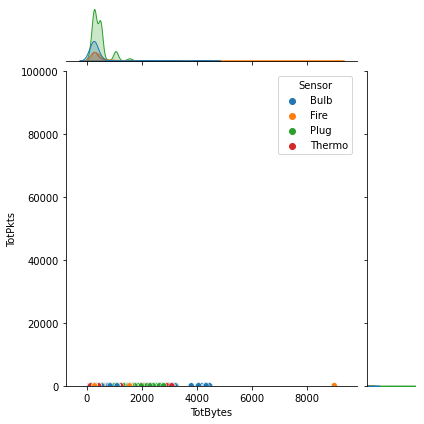

In [105]:
sns.jointplot(data=df.loc[df["Sensor"].isin(['Thermo', 'Bulb', 'Plug', 'Fire'])], x="TotBytes", y="TotPkts", hue="Sensor", ylim=(0, 100000))
plt.show()

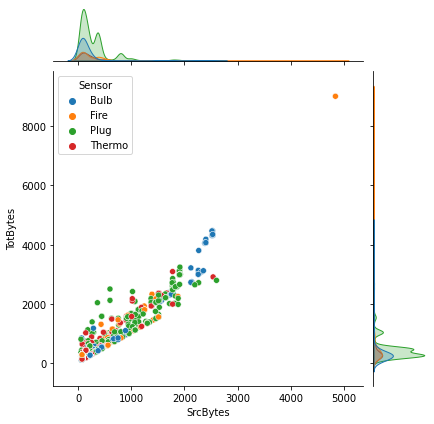

In [106]:
xval = "SrcBytes"
yval = "TotBytes"


sns.jointplot(data=df.loc[df["Sensor"].isin(['Thermo', 'Bulb', 'Plug', 'Fire'])], 
             x="SrcBytes", y="TotBytes", hue="Sensor")
fig.suptitle("{} vs {}".format(xval, yval))
plt.show()

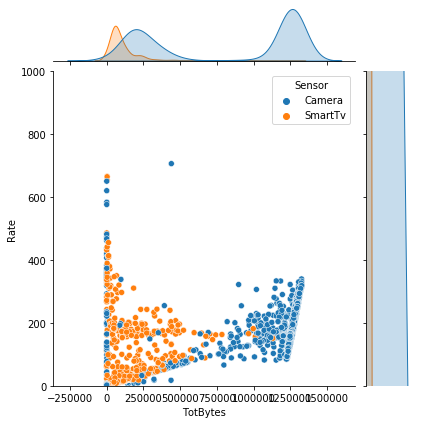

In [55]:
sns.jointplot(data=df.loc[df["Sensor"].isin(['SmartTv', 'Camera'])], x="TotBytes", y="Rate", hue="Sensor", ylim=(0, 1000))

# Data cleaning

#### Deleting columns with only one value

In [9]:
print("Columns with only one element: {}".format(df.loc[:,df.apply(pd.Series.nunique) == 1].columns.to_list()))

df_clean_cols = df.loc[:,df.apply(pd.Series.nunique) != 1]

print("Removed!")
print("Feature number => {}".format(df_clean_cols.shape[1]))

Columns with only one element: ['Proto', 'DstAddr', 'Retrans', 'SrcRetra', 'DstRetra', 'pRetran']
Removed!
Feature number => 27


In [108]:
null_counts = df_clean_cols.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
StartTime    0
SrcAddr      0
TotPkts      0
SrcPkts      0
DstPkts      0
TotBytes     0
SrcBytes     0
DstBytes     0
Dur          0
Load         0
SrcLoad      0
DstLoad      0
Loss         0
SrcLoss      0
DstLoss      0
pLoss        0
Rate         0
SrcRate      0
DstRate      0
Dir          0
State        0
SrcWin       0
DstWin       0
TcpRtt       0
SynAck       0
AckDat       0
Sensor       0
dtype: int64


##### Checking type of feature 

In [11]:
print("Data types and their frequency\n{}".format(df_clean_cols.dtypes.value_counts()))
print("\n\n")
object_columns_df = df_clean_cols.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

Data types and their frequency
float64    13
int64       9
object      5
dtype: int64



StartTime     08:31:20.369733
SrcAddr      10.0.0.160.39387
Dir                        ->
State                     CON
Sensor                  Quick
Name: 3718, dtype: object


###### Drop useless features

In [12]:
useless_cols = ['StartTime', 'SrcAddr']
try:
    df_clean_cols = df_clean_cols.drop(useless_cols, axis=1, inplace=False)
except KeyError as e:
    print("Already removed!")
print("Feature number => {}".format(df_clean_cols.shape[1]))

Feature number => 25


###### Check columns with few unique values

In [13]:
from numpy import unique

for i in df_clean_cols.columns:
    num = len(df_clean_cols[i].unique())
    percentage = float(num) / df_clean_cols.shape[0] * 100
    print('%s, %d, %.1f%%' % (i, num, percentage))

TotPkts, 688, 1.6%
SrcPkts, 452, 1.1%
DstPkts, 284, 0.7%
TotBytes, 7277, 17.0%
SrcBytes, 3372, 7.9%
DstBytes, 3529, 8.2%
Dur, 27350, 63.9%
Load, 29542, 69.0%
SrcLoad, 26493, 61.9%
DstLoad, 27461, 64.2%
Loss, 292, 0.7%
SrcLoss, 293, 0.7%
DstLoss, 25, 0.1%
pLoss, 2219, 5.2%
Rate, 29280, 68.4%
SrcRate, 26201, 61.2%
DstRate, 28139, 65.8%
Dir, 2, 0.0%
State, 5, 0.0%
SrcWin, 127, 0.3%
DstWin, 2563, 6.0%
TcpRtt, 5524, 12.9%
SynAck, 207, 0.5%
AckDat, 5491, 12.8%
Sensor, 9, 0.0%


In [14]:
df_clean_cols

,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Dur,Load,SrcLoad,DstLoad,...,SrcRate,DstRate,Dir,State,SrcWin,DstWin,TcpRtt,SynAck,AckDat,Sensor
3718,624,328,296,654166,634606,19560,4.985599,1046479.000,1015199.0,31280.400,...,65.588905,59.170422,->,CON,42496.0,10240.0,0.017832,0.000014,0.017818,Quick
4441,534,294,240,646300,630460,15840,4.990356,1032535.000,1007248.0,25287.100,...,58.713245,47.892376,->,CON,42496.0,11264.0,0.017832,0.000014,0.017818,Quick
5239,532,294,238,663544,647836,15708,4.981155,1062042.000,1036921.0,25121.800,...,58.821701,47.579327,->,CON,42496.0,11264.0,0.017832,0.000014,0.017818,Quick
5969,578,322,256,695604,678708,16896,4.882253,1136247.000,1108670.0,27577.400,...,65.748329,52.229984,->,CON,42496.0,1536.0,0.017832,0.000014,0.017818,Quick
6610,404,224,180,481800,469920,11880,3.609557,1063038.000,1036854.0,26183.800,...,61.780437,49.590572,->,RST,42496.0,512.0,0.017832,0.000014,0.017818,Quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103979,4,1,3,296,74,222,3.031651,390.546,0.0,390.546,...,0.000000,0.659707,->,ACC,21678.0,22241.0,0.000013,0.000013,0.000000,Bulb
103987,2,1,1,148,74,74,0.000010,0.000,0.0,0.000,...,0.000000,0.000000,->,ACC,21678.0,22241.0,0.000014,0.000014,0.000000,Thermo
103994,4,1,3,296,74,222,3.023730,391.569,0.0,391.569,...,0.000000,0.661435,->,ACC,21678.0,22241.0,0.000013,0.000013,0.000000,Plug
104001,4,1,3,296,74,222,3.043941,388.969,0.0,388.969,...,0.000000,0.657043,->,ACC,21678.0,22241.0,0.000015,0.000015,0.000000,Camera


###### Remove low variance columns

--> Threshold=0.00, Features=22
Low variance features:  ['SrcRetra', 'Retrans', 'pRetran', 'DstRetra']
--> Threshold=0.05, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Retrans']
--> Threshold=0.10, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Retrans']
--> Threshold=0.15, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Retrans']
--> Threshold=0.20, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Retrans']
--> Threshold=0.25, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Retrans']
--> Threshold=0.30, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Retrans']
--> Threshold=0.35, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Retrans']
--> Threshold=0.40, Features=21
Low variance features:  ['SrcRetra', 'SynAck', 'pRetran', 'DstRetra', 'Ret

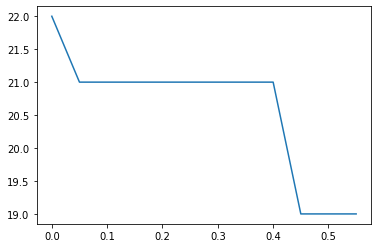

In [15]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from matplotlib import pyplot
# split data into inputs and outputs
X = df._get_numeric_data()
data = X
y = df.values[:, -1]

all_features = X.columns.to_list()
thresholds = np.arange(0.0, 0.60, 0.05)

results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    remained_features = data[data.columns[transform.get_support(indices=True)]].columns.to_list()
    print('--> Threshold=%.2f, Features=%d' % (t, n_features))
    print("Low variance features: ", list(set(all_features) - set(remained_features)))
    results.append(n_features)
    
# threshold vs number of selected features
pyplot.plot(thresholds, results)
pyplot.show()


In [16]:
# Drop columns (could drop also ['SrcRetra', 'pRetran', 'TcpRtt', 'DstRetra', 'AckDat', 'Retrans'])
useless_cols = ['SynAck', 'DstLoss']
df_variance = df_clean_cols
try:
    df_variance = df_variance.drop(useless_cols, axis=1)
except KeyError as e:
    print("Already removed!")
print("Feature number => {}".format(df_variance.shape[1]))


Feature number => 23


### Row with duplicated data

In [17]:
# check duplicates
print("Size of the dataset before row cleaning:", df_variance.shape)
dups = df_variance.duplicated()
print(dups.any())
df_clean = df_variance.drop_duplicates(inplace=False)
print("Size of the dataset after row cleaning:", df_clean.shape)

# TODO: clean only high value counts sensors

Size of the dataset before row cleaning: (42784, 23)
True
Size of the dataset after row cleaning: (39943, 23)


In [18]:
df_clean['Sensor'].value_counts()

Connect    23703
Quick       5762
Plug        3676
Camera      2423
SmartTv     1424
Bulb        1153
Fire         744
Heavy        539
Thermo       519
Name: Sensor, dtype: int64

### Label encoder
Convert string column into numbers... No more string column values

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_clean['Dir'] = le.fit_transform(df_clean['Dir'])
df_clean['State'] = le.fit_transform(df_clean['State'])

/home/antedo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/antedo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Normalize DataFrame

In [21]:
from pandas.api.types import is_numeric_dtype

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        if is_numeric_dtype(df[feature_name]):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            result[feature_name] = df[feature_name]
    return result

df_normalized = normalize(df_clean)
df_normalized

,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Dur,Load,SrcLoad,DstLoad,...,Rate,SrcRate,DstRate,Dir,State,SrcWin,DstWin,TcpRtt,AckDat,Sensor
3718,0.225480,0.140773,0.475884,0.512734,0.511451,0.233346,0.997120,0.104732,0.101653,0.003129,...,4.165330e-05,0.000066,5.917042e-05,0.0,0.25,0.286207,0.010246,0.001752,0.00175,Quick
4441,0.192906,0.126180,0.385852,0.506568,0.508109,0.188967,0.998071,0.103336,0.100857,0.002530,...,3.560200e-05,0.000059,4.789238e-05,0.0,0.25,0.286207,0.011270,0.001752,0.00175,Quick
5239,0.192182,0.126180,0.382637,0.520086,0.522113,0.187393,0.996231,0.106289,0.103828,0.002513,...,3.553393e-05,0.000059,4.757933e-05,0.0,0.25,0.286207,0.011270,0.001752,0.00175,Quick
5969,0.208831,0.138197,0.411576,0.545217,0.546994,0.201565,0.976451,0.113716,0.111012,0.002759,...,3.939438e-05,0.000066,5.222998e-05,0.0,0.25,0.286207,0.001537,0.001752,0.00175,Quick
6610,0.145856,0.096137,0.289389,0.377619,0.378725,0.141726,0.721912,0.106389,0.103821,0.002619,...,3.721602e-05,0.000062,4.959057e-05,0.0,1.00,0.286207,0.000512,0.001752,0.00175,Quick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103965,0.001086,0.000429,0.004823,0.000174,0.000060,0.002648,0.606385,0.000039,0.000000,0.000039,...,3.298237e-07,0.000000,6.596470e-07,0.0,0.00,0.145999,0.022254,0.000001,0.00000,Plug
103975,0.001086,0.000429,0.004823,0.000174,0.000060,0.002648,0.603982,0.000039,0.000000,0.000039,...,3.311357e-07,0.000000,6.622710e-07,0.0,0.00,0.145999,0.022254,0.000001,0.00000,Plug
103979,0.001086,0.000429,0.004823,0.000174,0.000060,0.002648,0.606330,0.000039,0.000000,0.000039,...,3.298533e-07,0.000000,6.597070e-07,0.0,0.00,0.145999,0.022254,0.000001,0.00000,Bulb
104001,0.001086,0.000429,0.004823,0.000174,0.000060,0.002648,0.608788,0.000039,0.000000,0.000039,...,3.285213e-07,0.000000,6.570430e-07,0.0,0.00,0.145999,0.022254,0.000001,0.00000,Camera


### Split into _Attack_ - _Not Attack_

In [22]:
not_attack_sensors = ['Camera', 'SmartTv','Thermo', 'Bulb', 'Plug', 'Fire']
attack_sensors = ['Quick', 'Heavy', 'Connect']


def label_attack(row):
    if any('{}'.format(i) in row['Sensor'] for i in attack_sensors):
        return 'Attack'
    if any('{}'.format(i) in row['Sensor'] for i in not_attack_sensors):
        return 'NotAttack'
    
    return 'Error'

df_normalized['Type'] = df_normalized.apply(lambda row: label_attack(row), axis=1)

df_normalized['Type']

3718         Attack
4441         Attack
5239         Attack
5969         Attack
6610         Attack
            ...    
103965    NotAttack
103975    NotAttack
103979    NotAttack
104001    NotAttack
104008    NotAttack
Name: Type, Length: 39943, dtype: object

#### Check Class distribution

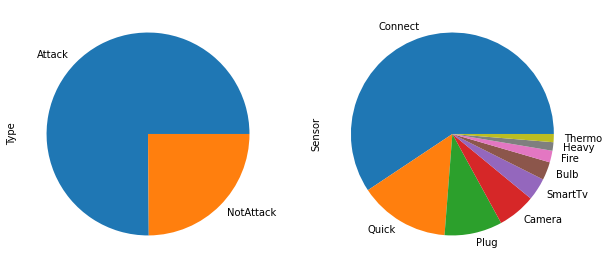

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_normalized['Type'].value_counts().plot(kind='pie', ax=ax[0])
df_normalized['Sensor'].value_counts().plot(kind='pie', ax=ax[1])

plt.show()

## ML start

Starting to predict **Attack** - **Not Attack** with imbalanced classes

In [24]:
from sklearn.model_selection import train_test_split

# Drop classes and slpit train/test
y = df_normalized.Type
y = y.map({'Attack': 1, 'NotAttack': 0}).astype(int)

X = df_normalized.drop(['Type', 'Sensor'] , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=666)

#### Try Logistic Regression 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, plot_confusion_matrix

def do_logistic_regression(X_tr, X_te, y_tr, y_te, description):
    lr = LogisticRegression(solver='liblinear').fit(X_tr, y_tr)
    lr_pred = lr.predict(X_te)

    print("Logistic regression - {}".format(description))
    print("Accuracy score: {:.4f}".format(accuracy_score(y_te, lr_pred)))
    print("F1 score: {:.4f}".format(f1_score(y_te, lr_pred)))
    print("Recall score: {:.4f}".format(recall_score(y_te, lr_pred)))


    plot_confusion_matrix(lr, X_te, y_te, cmap=plt.cm.Blues, display_labels=['NotAttack', 'Attack'])
    plt.show()

#### Try Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

def do_random_forest(X_tr, X_te, y_tr, y_te, description):
    rfc = RandomForestClassifier(n_estimators = 10).fit(X_tr, y_tr)
    rfc_pred = rfc.predict(X_te)

    print("Random Forest - {}".format(description))
    print("Accuracy score: {:.4f}".format(accuracy_score(y_te, rfc_pred)))
    print("F1 score: {:.4f}".format(f1_score(y_te, rfc_pred)))
    print("Recall score: {:.4f}".format(recall_score(y_te, rfc_pred)))
        

    plot_confusion_matrix(rfc, X_te, y_te, cmap=plt.cm.Blues, display_labels=['NotAttack', 'Attack'])
    plt.show()

Random Forest - imbalanced classes - Attack/NotAttack
Accuracy score: 0.9875
F1 score: 0.9916
Recall score: 0.9864


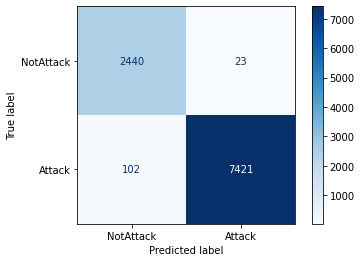

In [27]:
do_random_forest(X_train, X_test, y_train, y_test)

### RESAMPLING

### Oversampling minority classes ?

In [31]:
from sklearn.utils import resample

# Drop classes and slpit train/test
y = df_normalized.Type
y = y.map({'Attack': 1, 'NotAttack': 0}).astype(int)

X = df_normalized.drop(['Type', 'Sensor'] , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=666)

X = pd.concat([X_train, y_train], axis=1)

attack = X[X.Type==0]
not_attack = X[X.Type==1]

# upsample minority
not_attack_upsampled = resample(not_attack,
                          replace=True, 
                          n_samples=len(attack), # match number in majority class
                          random_state=27) 

# combine majority and upsampled minority
upsampled = pd.concat([attack, not_attack_upsampled])

upsampled.Type.value_counts()

26166     1
8324      1
19813     1
110753    1
113309    1
         ..
110075    1
109937    1
109864    1
28814     1
103853    0
Name: Type, Length: 9986, dtype: int64


1    7476
0    7476
Name: Type, dtype: int64

Random Forest - downsampled classes - Attack/NotAttack
Accuracy score: 0.9926
F1 score: 0.9924
Recall score: 0.9862


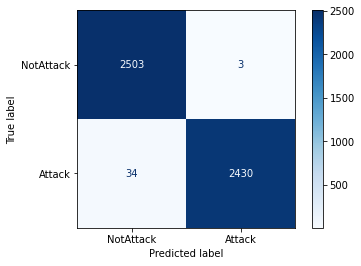

--------------------
Logistic regression - downsampled classes - Attack/NotAttack
Accuracy score: 0.9169
F1 score: 0.9115
Recall score: 0.8636


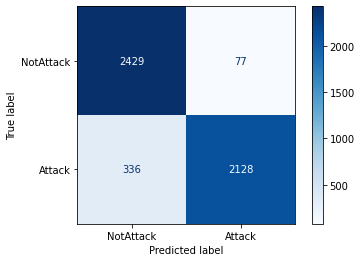

In [47]:
y_train = upsampled.Type
X_train = upsampled.drop(['Type'], axis=1)
do_random_forest(X_train, X_test, y_train, y_test, "downsampled classes - Attack/NotAttack")
print("-"*20)
do_logistic_regression(X_train, X_test, y_train, y_test, "downsampled classes - Attack/NotAttack")

###  downsampling attack / no attack

In [35]:
# Separate majority and minority classes
df_not_attack = df_normalized[df_normalized.Type=='NotAttack']
df_attack = df_normalized[df_normalized.Type=='Attack']

print("NotAttack: {}".format(df_normalized['Type'].value_counts()['NotAttack']))

# Downsample majority class
df_attack_downsampled = resample(df_attack, 
                                 replace=False,    
                                 n_samples=df_normalized['Type'].value_counts()['NotAttack'],     
                                 random_state=123) 

df_downsampled = pd.concat([df_attack_downsampled, df_not_attack])

NotAttack: 9939


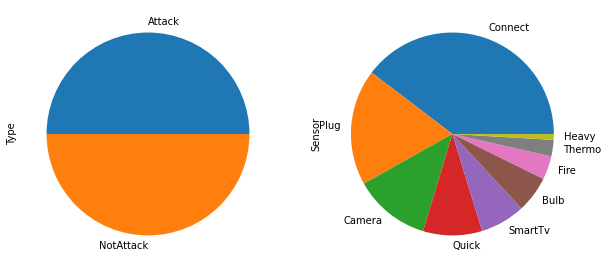

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_downsampled['Type'].value_counts().plot(kind='pie', ax=ax[0])
df_downsampled['Sensor'].value_counts().plot(kind='pie', ax=ax[1])

plt.show()

##### ML on downsampled attack-notattack

Random Forest - imbalanced classes - Attack/NotAttack
Accuracy score: 0.9920
F1 score: 0.9918
Recall score: 0.9870


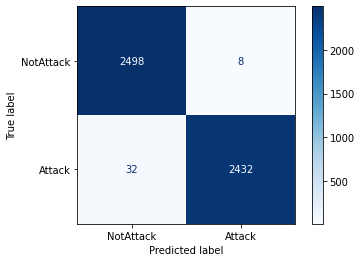

In [41]:
y = df_downsampled.Type
y = y.map({'Attack': 1, 'NotAttack': 0}).astype(int)

X = df_downsampled.drop(['Type', 'Sensor'] , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=666)

do_random_forest(X_train, X_test, y_train, y_test)

In [136]:

# Separate majority and minority classes
df_camera = df_normalized[df_normalized.Sensor=='Camera']
df_plug = df_normalized[df_normalized.Sensor=='Plug']
df_tv = df_normalized[df_normalized.Sensor=='SmartTv']
df_fire = df_normalized[df_normalized.Sensor=='Fire']
df_thermo = df_normalized[df_normalized.Sensor=='Thermo']
df_bulb = df_normalized[df_normalized.Sensor=='Bulb']
df_quick = df_normalized[df_normalized.Sensor=='Quick']
df_heavy = df_normalized[df_normalized.Sensor=='Heavy']
df_connect = df_normalized[df_normalized.Sensor=='Connect']
 
# Downsample majority class
df_camera_downsampled = resample(df_camera, 
                                 replace=False,    
                                 n_samples=200,     
                                 random_state=123) 

df_plug_downsampled = resample(df_plug, 
                                 replace=False,    
                                 n_samples=200,    
                                 random_state=123)
df_tv_downsampled = resample(df_tv, 
                                 replace=False,   
                                 n_samples=200,     
                                 random_state=123) 

df_fire_downsampled = resample(df_fire, 
                                 replace=False,   
                                 n_samples=200,     
                                 random_state=123) 

df_bulb_downsampled = resample(df_bulb, 
                                 replace=False,   
                                 n_samples=200,     
                                 random_state=123)

df_thermo_downsampled = resample(df_thermo, 
                                 replace=False,   
                                 n_samples=200,     
                                 random_state=123)

df_connect_downsampled = resample(df_connect, 
                                 replace=False,    
                                 n_samples=200,    
                                 random_state=123)

df_downsampled = pd.concat([df_camera_downsampled, df_plug_downsampled, df_tv_downsampled, df_fire_downsampled, df_thermo_downsampled, df_bulb_downsampled, 
                           df_connect_downsampled, df_heavy, df_quick])


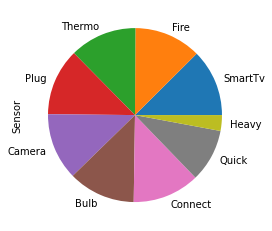

In [137]:
df_downsampled['Sensor'].value_counts().plot(kind='pie')
plt.show()

Logistic regression - imbalanced classes - Attack/NotAttack
Accuracy score: 0.4328


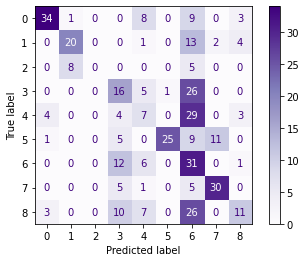

In [150]:
from sklearn.model_selection import train_test_split

# Drop classes and slpit train/test
y = df_downsampled.Sensor
y = y.map({'Connect': 0, 'Quick': 1, 'Heavy':2, 'Thermo': 3, 'Fire': 4, 'SmartTv': 5, 'Bulb': 6, 'Camera': 7, 'Plug': 8}).astype(int)

X = df_downsampled.drop(['Type', 'Sensor'] , axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=666)

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic regression - imbalanced classes - Attack/NotAttack")
print("Accuracy score: {:.4f}".format(accuracy_score(y_test, lr_pred)))
#print("F1 score: {:.4f}".format(f1_score(y_test, lr_pred, average=None)))
#print("Recall score: {:.4f}".format(recall_score(y_test, lr_pred)))


plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Purples)
plt.show()

In [ ]:
# attacco - no attacco
# ognuno con la sua etichetta -> attacco / no attacco

In [ ]:
k-nearest neighbours

Naive Bayes

Decision trees

Support vector machines